In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os


In [6]:
directory='img'

#get all images from dir

dataset=tf.keras.preprocessing.image_dataset_from_directory(directory=directory, color_mode='rgb', batch_size=128, image_size=(32,32), label_mode=None, shuffle=True, seed=42)

#normalize the data

dataset=dataset.map(lambda x: x/255.00)

Found 1008 files.


In [11]:
#grid of images
from mpl_toolkits.axes_grid1 import ImageGrid


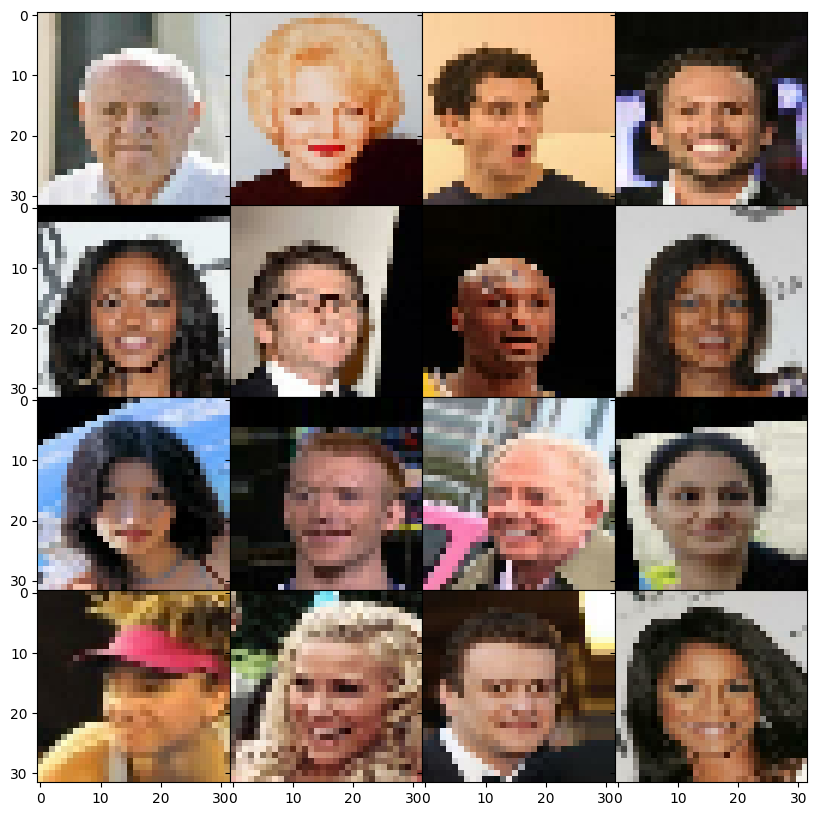

In [13]:
it=iter(dataset)
one_batch=next(it).numpy()
images=one_batch[:16,:,:,:]

#show the img

fig=plt.figure(figsize=(10,10))
grid= ImageGrid(fig, 111, nrows_ncols=(4,4),axes_pad=0)
for ax,im in zip(grid, images):
    ax.imshow(im)
plt.show()


In [27]:
from tensorflow.keras.layers import Conv2D, LeakyReLU, BatchNormalization, Dropout, Flatten, Dense, Activation, Reshape
from tensorflow.keras import Model, Input

def discriminator_model():
    disc_input=Input(shape=(32,32,3), name='discriminator_network')
    x=Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same')(disc_input)
    x=LeakyReLU()(x)
    X=Dropout(0.2)(x)

    x=Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same')(disc_input)
    x=LeakyReLU()(x)
    X=Dropout(0.2)(x)

    x=Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same')(disc_input)
    x=LeakyReLU()(x)
    X=Dropout(0.2)(x)

    x=Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same')(disc_input)
    x=LeakyReLU()(x)
    X=Dropout(0.2)(x)
    
    x=Flatten()(x)
    x=Dense(1)(x)
    
    output= Activation('sigmoid')(x)
    disc=Model(inputs= disc_input, outputs=output)
    return disc

In [29]:
disc_model=discriminator_model()
disc_model.summary(0)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ discriminator_network           │ (None, 32, 32, 3)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        16,385 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,177 (71.00 KB)

 Trainable params: 18,177 (71.00 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from tensorflow.keras.layers import Conv2D, LeakyReLU, BatchNormalization, Dropout, Flatten, Dense, Activation, Reshape, Conv2DTranspose
from tensorflow.keras import Model, Input
def generator_model(z_dim=100):
    gen_input=Input(shape=(z_dim,), name='generator_network')

    x=Dense(8*8*3)(gen_input)
    x=Reshape(target_shape=(8,8,3))(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)



    x=Conv2DTranspose(filters=512, kernel_size=3, strides=(1,1), padding='same')(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)



    x=Conv2DTranspose(filters=256, kernel_size=3, strides=(2,2), padding='same')(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)


    x=Conv2DTranspose(filters=128, kernel_size=3, strides=(1,1), padding='same')(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)


    x=Conv2DTranspose(filters=128, kernel_size=3, strides=(2,2), padding='same')(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)


    x=Conv2DTranspose(filters=64, kernel_size=3, strides=(1,1), padding='same')(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)


    x=Conv2DTranspose(filters=3, kernel_size=3, strides=(1,1), padding='same')(x)
    x=BatchNormalization()(x)
    fake_images_gen=LeakyReLU()(x)



    model_gen=Model(inputs= gen_input, outputs=fake_images_gen)
    return model_gen

In [44]:
gen_model=generator_model()

In [45]:
gen_model.summary(0)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ generator_network (InputLayer)  │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 192)            │        19,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 8, 8, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 3)        │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 8, 8, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 512)      │        14,336 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 256)    │     1,179,904 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 16, 16, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 32, 32, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,736,155 (6.62 MB)

 Trainable params: 1,733,967 (6.61 MB)

 Non-trainable params: 2,188 (8.55 KB)

In [48]:
disc_model=discriminator_model()
gen_model=generator_model()

#compile the model thet trains disc
disc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
#compile the model that trains generator
z_dim=100
disc_model.trainable= False
model_input=Input(shape=(z_dim,), name='model_input')

model_output=disc_model(gen_model(model_input))
model=Model(model_input, model_output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
model.summary(0)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ model_input (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_6 (Functional)       │ (None, 32, 32, 3)      │     1,736,155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_5 (Functional)       │ (None, 1)              │        18,177 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,754,332 (6.69 MB)

 Trainable params: 1,733,967 (6.61 MB)

 Non-trainable params: 20,365 (79.55 KB)

In [78]:
def train_discriminator(batch, batch_size):
    valid=np.ones((batch_size, 1))
    fake=np.zeros((batch_size, 1))

    disc_model.train_on_batch(batch, valid)

    noise=np.random.normal(0,1,(batch_size, z_dim))
    gen_image=gen_model.predict(noise)
    disc_model.train_on_batch(gen_image, fake) 


def train_generator(batch_size):
    valid=np.ones((batch_size, 1))
    noise=np.random.normal(0,1,(batch_size, z_dim))
    model.train_on_batch(noise, valid) 

In [83]:
def save_image(fake_image, path):
    image=tf.keras.preprocessing.image.array_to_img(fake_image.numpy())
    tf.keras.preprocessing.image.save_img(path, image)
    return image
def generate_and_save_images(path):
    noise=np.random.normal(0,1,(1, z_dim))
    fake_images=gen_model(noise)
    image=save_image(fake_images[0], path)
    plt.imshow(image)
    plt.show()

No of epochs0
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
Batch images0


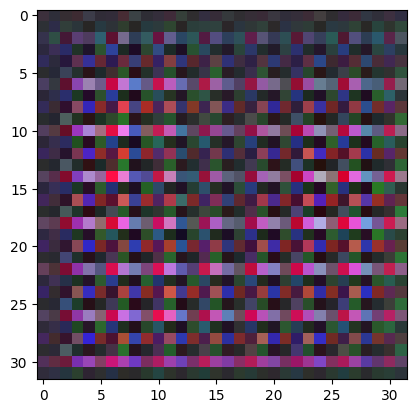

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


c:\Users\sivar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step
No of epochs1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Batch images0


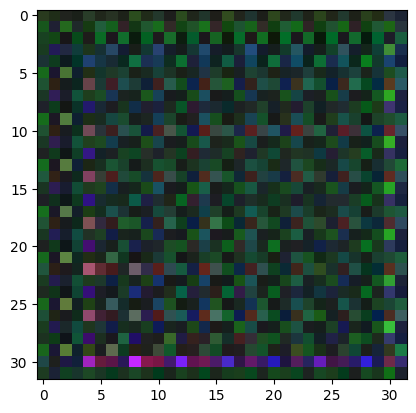

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
No of epochs2
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
Batch images0


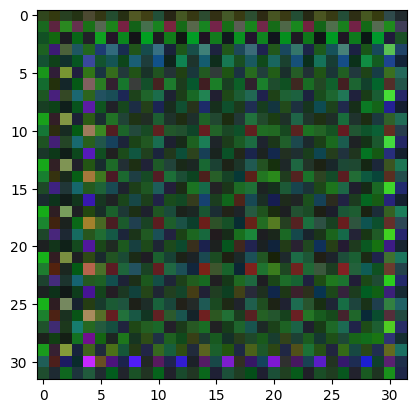

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
No of epochs3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
Batch images0


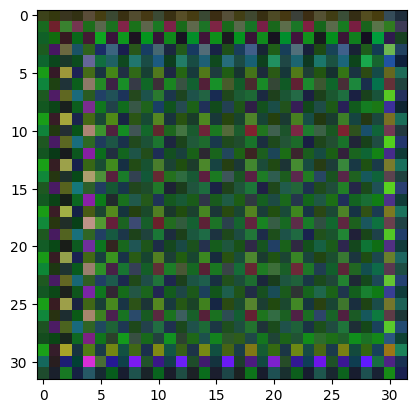

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
No of epochs4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Batch images0


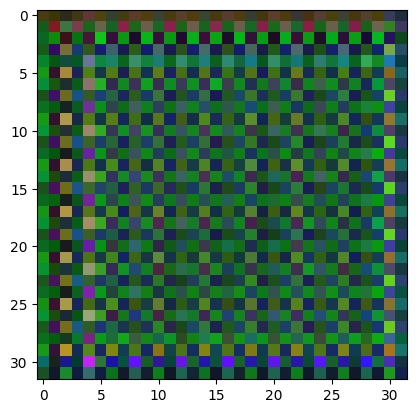

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
No of epochs5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
Batch images0


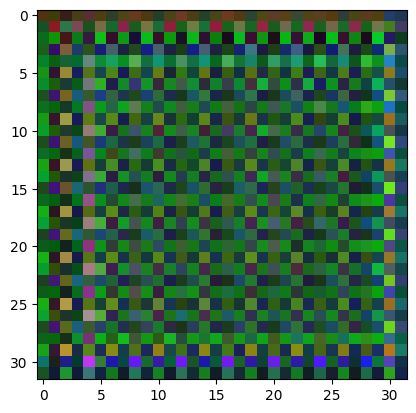

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
No of epochs6
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
Batch images0


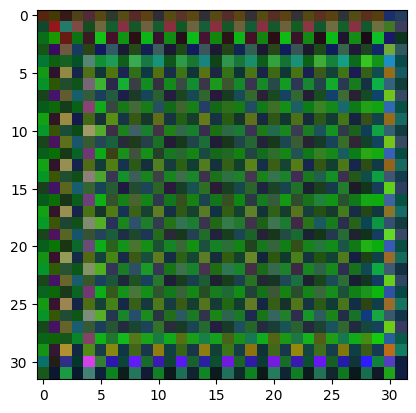

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
No of epochs7
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step
Batch images0


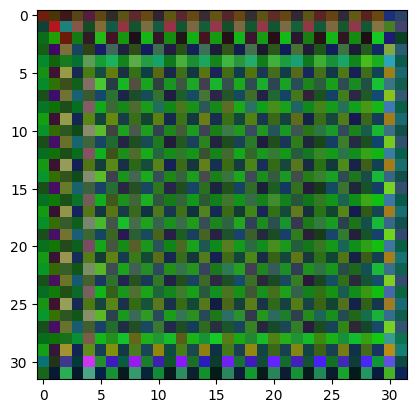

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step
No of epochs8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step
Batch images0


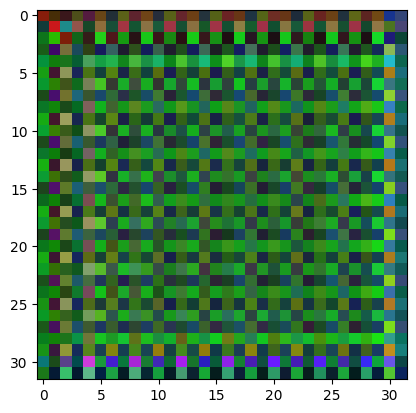

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
No of epochs9
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step
Batch images0


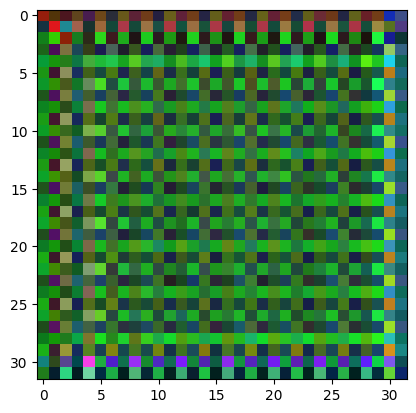

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step
2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step

KeyboardInterrupt: 

In [84]:
PATH = 'generate_face'
os.makedirs(PATH, exist_ok=True)
for epochs in range(10):
    print(f'No of epochs{epochs}')
    for i,batch in enumerate(dataset):
        train_discriminator(batch, batch.shape[0])
        train_generator(batch.shape[0])
        if i%100==0:
            print(f'Batch images{i}')
            PATH='generate_face'
            generate_and_save_images(path=f'{PATH}/epochs{epochs}batch_{1}.jpg')

